In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# The csv is generating using `cargo run --release ops > analysis/ops.csv
arr = np.loadtxt("ops.csv", delimiter=",", dtype=int)

In [4]:
n = arr.transpose()[0]
n = n.reshape((-1, 1))
n = np.log2(n)

In [5]:
y = arr.transpose()[1]
y = np.log2(y)

In [6]:
regr = LinearRegression().fit(n, y)
regr.score(n, y)

0.9999994812592823

model.summary()

In [7]:
regr.coef_

array([1.46729923])

In [8]:
regr.intercept_

1.2700471823313606

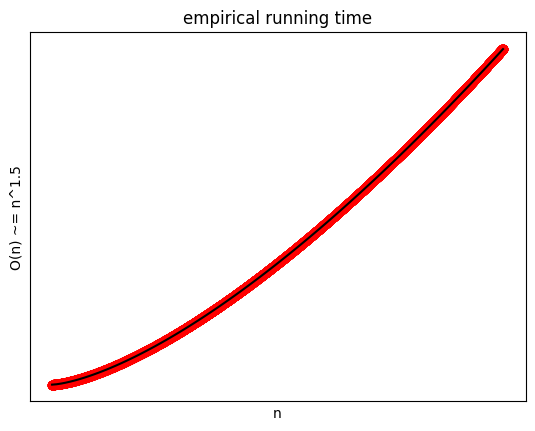

In [28]:
n_orig = arr.transpose()[0].reshape((-1, 1))
y_orig = arr.transpose()[1]
# Plot outputs
plt.scatter(n_orig, y_orig, color="red")
plt.xticks(())
plt.yticks(())

x = np.linspace(100, 100000000, 100)
y_pred = (2**regr.intercept_) * np.power(x, regr.coef_)

plt.ylabel("O(n) ~= n^1.5")
plt.xlabel("n")
plt.title("empirical running time")
plt.plot(x, y_pred, color="black")

plt.show()

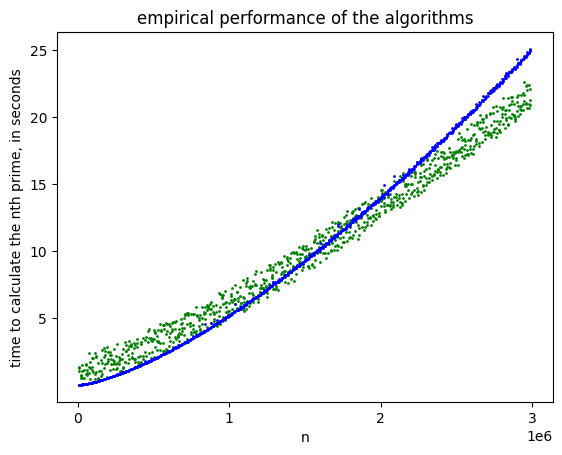

In [30]:
# The csv is generating using `cargo run --release timings1 > analysis/timings1.csv
timings1 = np.loadtxt("timings1.csv", delimiter=",", dtype=int)
timings1 = timings1[timings1[:,0]<3000000, :]
# The csv is generating using `cargo run --release timings3 > analysis/timings3.csv
timings3 = np.loadtxt("timings3.csv", delimiter=",", dtype=int)
timings3 = timings3[timings3[:,0]<3000000, :]

# Plot output
plt.scatter(timings1.transpose()[0].reshape((-1, 1)), timings1.transpose()[1] / 1000000, color="green", s=1)
plt.scatter(timings3.transpose()[0].reshape((-1, 1)), timings3.transpose()[1] / 1000000, color="blue", s=1)


plt.xticks([i*1000000 for i in [0, 1, 2, 3]])
plt.yticks([5, 10, 15, 20, 25])

plt.xlabel("n")
plt.ylabel("time to calculate the nth prime, in seconds")
plt.title("empirical performance of the algorithms")
plt.show()